In [17]:

import pandas as pd
from main import dicParams, dicFiles
from ImportUtils import vprint, vprint_time
#from ImportUtils import get_dfGeo_from_MDB, get_dfSchools_from_MDB, get_dfCursos_from_MDB, get_dfExames_from_MDB, get_dfResultados_from_MDB, get_dfResultAnalise_from_MDB
#from ImportUtils import get_dfAll_from_datasets
from ImportUtils import get_dfGeo_from_Parquet, get_dfSchools_from_Parquet, get_dfCursos_from_Parquet, get_dfExames_from_Parquet, get_dfResultados_from_Parquet, get_dfResultAnalise_from_Parquet
from ImportUtils import get_dfAll_from_Parquet
import matplotlib.pyplot as plt

# Set the locale to your system's default (for the desired thousands separator)
import locale
locale.setlocale(locale.LC_ALL, 'pt_PT')

from main import dicParams, dicFiles
from ChartUtils import linechart, barchart, barchart_nseries



# Get Data

In [4]:

dfAll = get_dfAll_from_Parquet()


In [55]:
dfAll['Class_Exam'].head()

0     5.2
1    11.8
2     9.1
3     4.0
4    11.0
Name: Class_Exam, dtype: float64

In [71]:
#print( dfx[dfx['Class_Exam'].isnull()].count() )

dfxNull = dfx[dfx['Class_Exam'].isnull()]
print(dfxNull[['ano', 'Class_Exam', 'Fase']])

print(dfxNull.shape)
print(dfAll.shape)

# (8, 31)
# (5901336, 31)

dfAll = dfAll.dropna(subset=['Class_Exam'])

print(dfAll.shape)


          ano  Class_Exam Fase
4254390  2011         NaN    1
4367715  2011         NaN    2
4371678  2011         NaN    1
4399313  2011         NaN    1
4430616  2011         NaN    2
4451414  2011         NaN    2
4466764  2011         NaN    1
5881795  2011         NaN    2
(8, 31)
(5901328, 31)
(5901328, 31)


(5901328, 34)
(4284975, 34)
(3647019, 34)


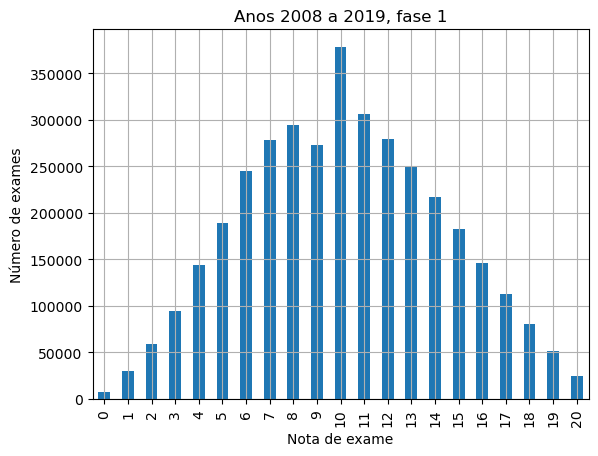

.....................
(5901328, 34)


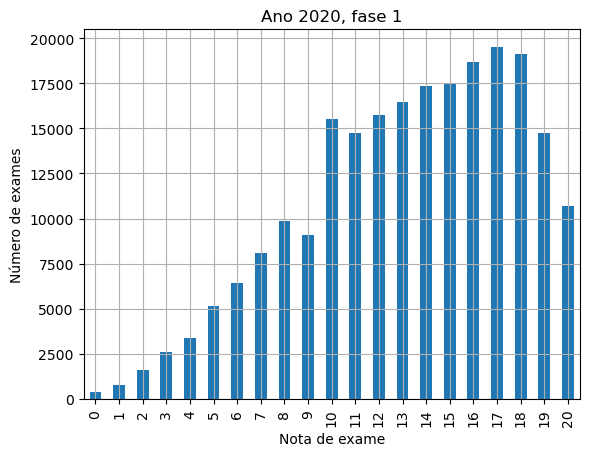

(5901328, 34)


In [107]:
dfx = dfAll

# Round the 'class_exam' column to integers
dfx['Class_Exam_Rounded'] = dfx['Class_Exam'] + 0.001
dfx['Class_Exam_Rounded'] =dfx['Class_Exam_Rounded'].round().astype(int)

#dfx[['Class_Exam', 'Class_Exam_Rounded']].head(50)

#x = dfx.groupby( 'Class_Exam_Rounded').transform('count')
# Group by 'Class_Exam_Rounded' and count the records in each group
#dfx_grades = dfx.groupby('Class_Exam_Rounded').size().reset_index(name='count')

#barchart(dfx_grades, 'Class_Exam_Rounded')
#barchart(dfx, 'Class_Exam_Rounded')

print(dfx.shape)
#print(dfx[ (dfx['Fase'] == '1') & (dfx['ano'] < 2019)])
dfxx = dfx[dfx['Fase'] == '1']
print(dfxx.shape)
dfxx = dfxx[ dfxx['ano'] < 2020]
print(dfxx.shape)
barchart(dfxx, 'Class_Exam_Rounded')

print(".....................")
print(dfx.shape)

dfxx = dfx[ (dfx['Fase'] == '1') & (dfx['ano'] == 2020)]
barchart(dfxx, 'Class_Exam_Rounded')
print(dfx.shape)



# Line Charts

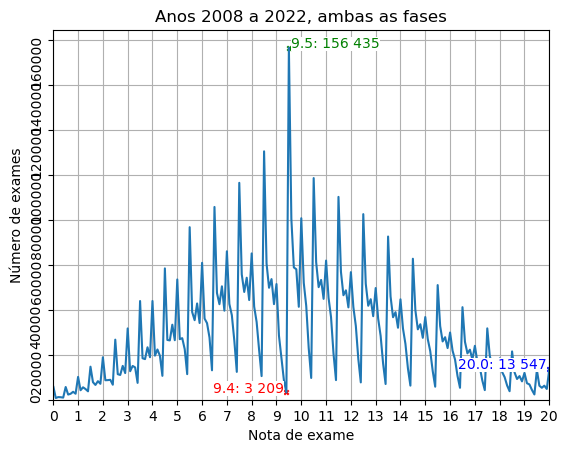

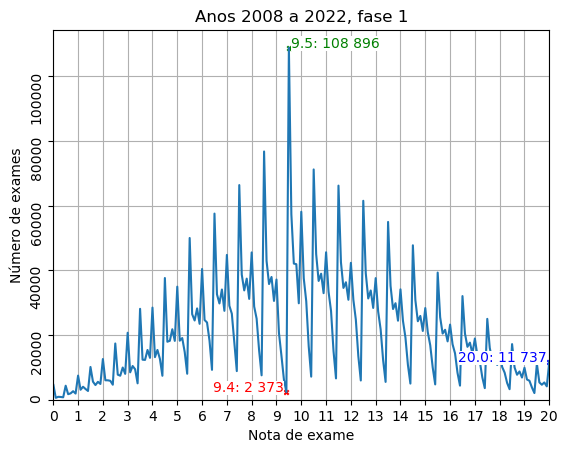

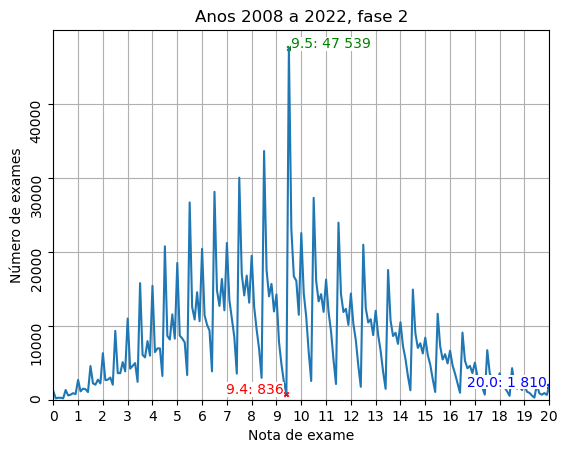

In [9]:

linechart(dfAll, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
dfResultAnaliseAll = dfAll[(dfAll['Fase'] == '1')]
linechart(dfResultAnaliseAll, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
dfResultAnaliseAll = dfAll[(dfAll['Fase'] == '2')]
linechart(dfResultAnaliseAll, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )


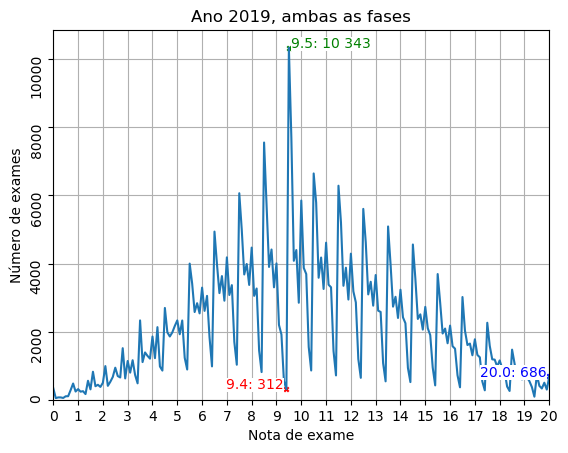

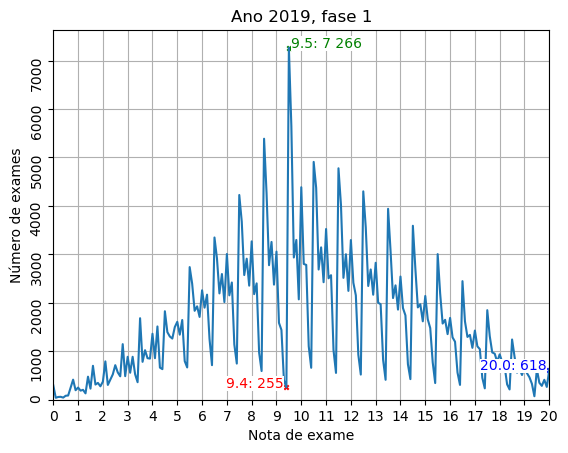

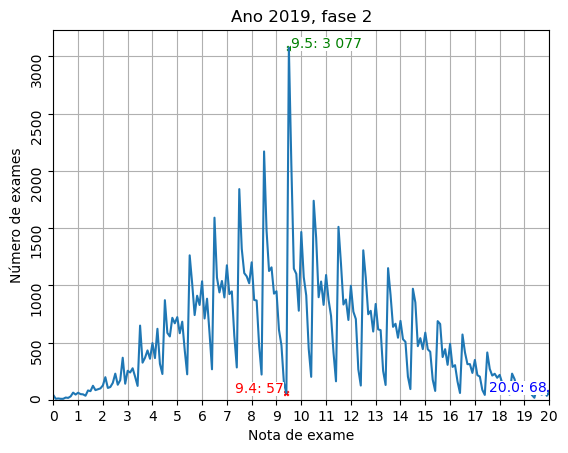

In [10]:

dfResultAnalise2019 = dfAll[(dfAll['ano'] == 2019)]
linechart(dfResultAnalise2019, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
dfResultAnalise2019 = dfAll[(dfAll['ano'] == 2019) & (dfAll['Fase'] == '1')]
linechart(dfResultAnalise2019, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
dfResultAnalise2019 = dfAll[(dfAll['ano'] == 2019) & (dfAll['Fase'] == '2')]
linechart(dfResultAnalise2019, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )


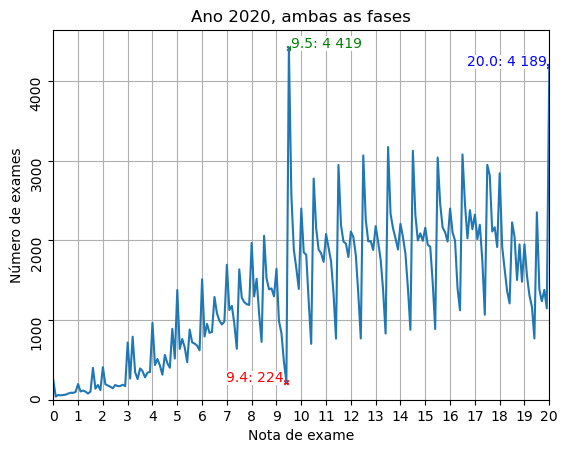

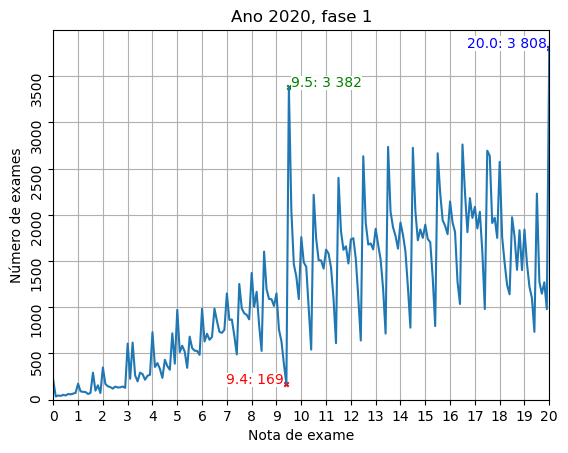

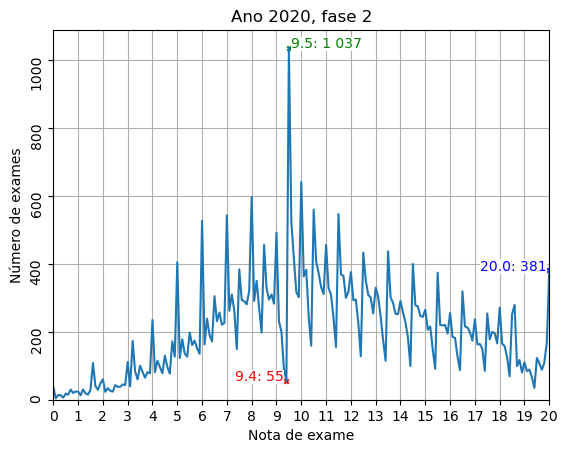

In [11]:

dfResultAnalise2020 = dfAll[(dfAll['ano'] == 2020) ]
linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
dfResultAnalise2020 = dfAll[(dfAll['ano'] == 2020) & (dfAll['Fase'] == '1')]
linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
dfResultAnalise2020 = dfAll[(dfAll['ano'] == 2020) & (dfAll['Fase'] == '2')]
linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )


# Exames por Sexo, Pub/Priv e Fase

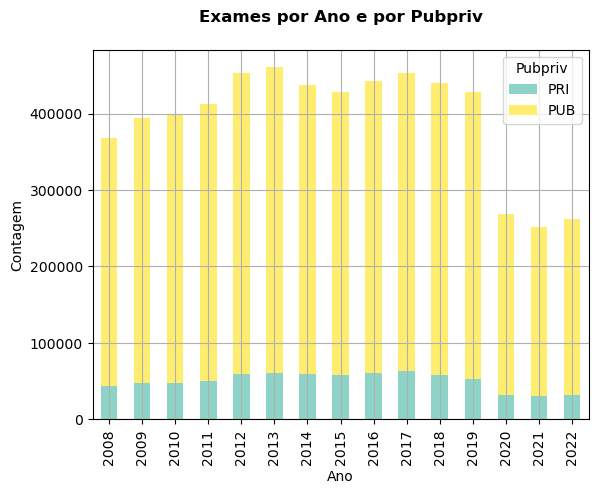

In [5]:
#dfExamesPorPubPriv = dfAll.groupby(['ano', 'PubPriv']).size().reset_index(name='counts')
barchart_nseries(dfAll, index='ano', columns='PubPriv', values='counts')


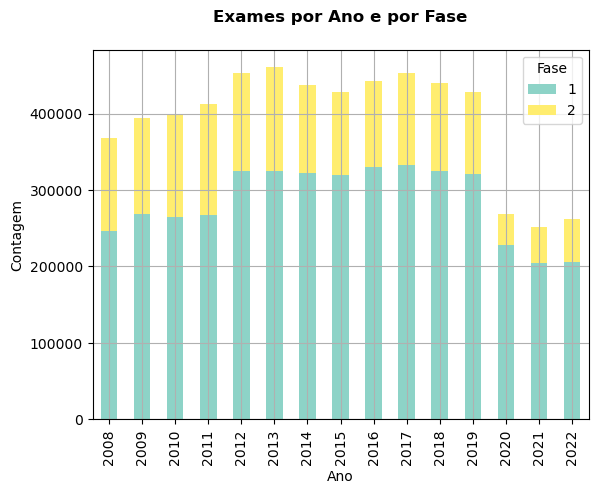

In [6]:

barchart_nseries(dfAll, index='ano', columns='Fase', values='count',  title=None, xlabel='Ano', ylabel=None, grid=True, stacked=False, colormap='Set3')



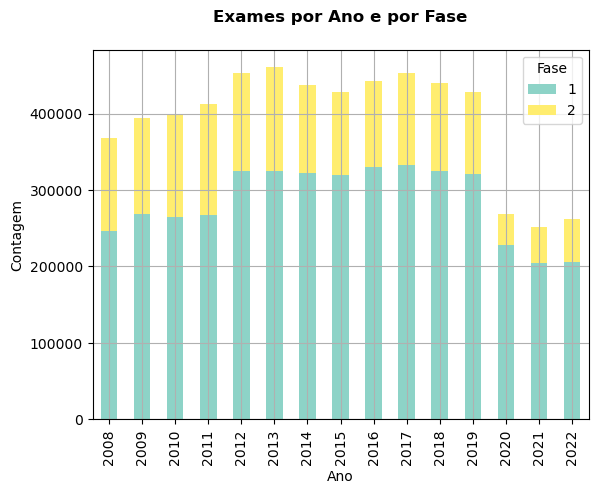

In [7]:
barchart_nseries(dfAll, index='ano', columns='Fase', values='counts')


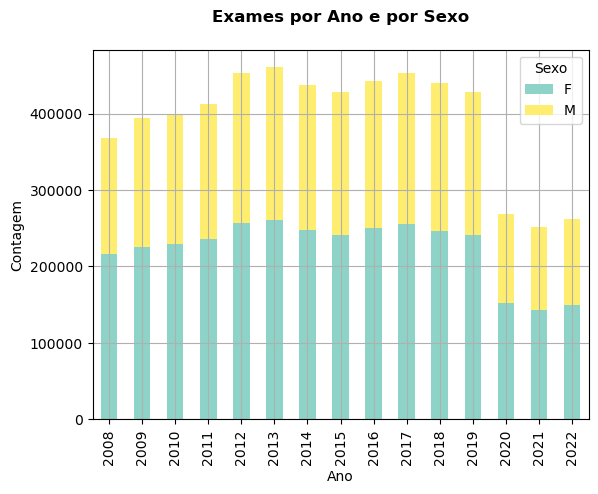

In [8]:
barchart_nseries(dfAll, index='ano', columns='Sexo', values='counts')


In [ ]:

dfResultados    = get_dfResultados_from_Parquet()
vprint("dfResultados.shape: ", dfResultados.shape)
current_time = vprint_time(current_time, 'Loaded dfResultados from Parquet...')
#vprint("dfResultados.shape: ", dfResultados.shape)
#current_time = vprint_time(current_time, 'Loaded dfResultados from Parquet...')


dfResultAnalise = get_dfResultAnalise_from_Parquet()
vprint("dfResultAnalise.shape: ", dfResultAnalise.shape)
current_time = vprint_time(current_time, 'Loaded dfResultAnalise from Parquet...')


# endregion


dfExamesPorAno = dfResultados.groupby(['ano', 'Fase']).size().reset_index(name='counts')
# PUBPRIV dfExamesPorSexo = dfResultados.groupby(['ano', 'Sexo']).size().reset_index(name='counts')
dfExamesPorSexo = dfResultados.groupby(['ano', 'Sexo']).size().reset_index(name='counts')
#print(dfExamesPorAno.head(10))
#print(dfResultados.head(10))

#barchart_nseries(dfExamesPorAno, index='ano', columns='Fase', values='counts')
#barchart_nseries(dfResultados, index='ano', columns='Fase', values='counts')
#barchart_nseries(dfResultados, index='ano', columns='Sexo', values='counts')
# barchart_nseries(dfResultados, index='ano', columns='Fase', values='count',  title=None, xlabel='Ano', ylabel=None, grid=True, stacked=False, colormap='Set3')

#barchart(dfExamesPorAno, "ano", "counts", "Fase", "Número de exames", "Ano", "Distribuição de exames por ano e fase", True)

dfAll = get_dfAll_from_Parquet()
vprint("dfAll.shape: ", dfAll.shape)
current_time = vprint_time(current_time, 'Loaded dfAll from Parquet...')

dfExamesPorPubPriv = dfAll.groupby(['ano', 'PubPriv']).size().reset_index(name='counts')
#barchart_nseries(dfExamesPorPubPriv, index='ano', columns='PubPriv', values='counts')
barchart_nseries(dfAll, index='ano', columns='PubPriv', values='counts')
print("done")

# region Create charts comparing All Years, 2019 and 2020
# dfResultAnalise = dfResultados
# dfResultAnaliseAll = dfResultAnalise
# linechart(dfResultAnaliseAll, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnaliseAll = dfResultAnalise[(dfResultAnalise['Fase'] == '1')]
# linechart(dfResultAnaliseAll, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnaliseAll = dfResultAnalise[(dfResultAnalise['Fase'] == '2')]
# linechart(dfResultAnaliseAll, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )

# dfResultAnalise2019 = dfResultAnalise[(dfResultAnalise['ano'] == 2019)]
# linechart(dfResultAnalise2019, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2019 = dfResultAnalise[(dfResultAnalise['ano'] == 2019) & (dfResultAnalise['Fase'] == '1')]
# linechart(dfResultAnalise2019, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2019 = dfResultAnalise[(dfResultAnalise['ano'] == 2019) & (dfResultAnalise['Fase'] == '2')]
# linechart(dfResultAnalise2019, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )

# dfResultAnalise2020 = dfResultAnalise[(dfResultAnalise['ano'] == 2020) ]
# linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2020 = dfResultAnalise[(dfResultAnalise['ano'] == 2020) & (dfResultAnalise['Fase'] == '1')]
# linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )
# dfResultAnalise2020 = dfResultAnalise[(dfResultAnalise['ano'] == 2020) & (dfResultAnalise['Fase'] == '2')]
# linechart(dfResultAnalise2020, "Class_Exam", dots=((9.4, 'right', 'red', 'x', 10), (9.5, 'left', 'green', 'x', 10), (20, 'right', 'blue', 'x', 10)) )

# endregion



# Create bar chart with a series for each value of Fase
#dfResultados.groupby(['ano', 'Fase']).size().unstack().plot(kind='bar', stacked=True)

#dfResultados.groupby(['ano', 'Fase']).size().unstack().plot(kind='bar', stacked=False)
#dfResultados.groupby(['ano', 'Fase']).size().unstack().plot(kind='bar', stacked=False)
#plt.show()


#linechart(dfResultAnalise)






In [20]:
from ChartUtils import linechart, barchart, barchart_nseries


In [46]:
del df

NameError: name 'df' is not defined

PubPriv       PRI       PUB
ano                        
2008     0.118844  0.881156
2009     0.120189  0.879811
2010     0.118204  0.881796
2011     0.122562  0.877438
2012     0.130293  0.869707
2013     0.130355  0.869645
2014     0.135959  0.864041
2015     0.134779  0.865221
2016     0.137162  0.862838
2017     0.139744  0.860256
2018     0.132792  0.867208
2019     0.123095  0.876905
2020     0.115836  0.884164
2021     0.118623  0.881377
2022     0.123017  0.876983


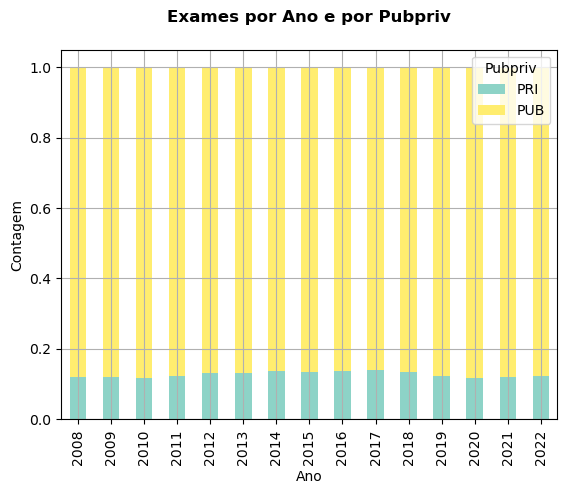

In [49]:
xxbarchart_nseries(dfAll, xAxis='ano', dataSeries='PubPriv', values='counts', stacked=True, normalize=True)
